# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
import json 
import requests


#target_url = "http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=8f0b0efa2c2a1bd9fba87e03fc58338d"

api_key = '8f0b0efa2c2a1bd9fba87e03fc58338d'
WeatherData = {"City":["ABC","XYZ"],"Cloudiness":[1,2], "Country":["A","B"],"Date":[1000000,1000001],"Humidity":[1,2],
               "Lat":[11.1,22.2],"Lng":[11.1,22.2],"Max Temp":[100,200],"Wind Speed":[10,20]}
#AddRow = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed":[]}

WeatherDF = pd.DataFrame(WeatherData)

for target_city in cities:
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&APPID={1}').format(target_city, api_key) 
    
    try:
        response = requests.get(target_url)
        Data_json = response.json()
#Assign Json to DataFrame
        print(target_city + "# " + str(Data_json["id"]) + " is being loaded.")
        WeatherData["City"] = Data_json["name"]
        WeatherData["Cloudiness"] = Data_json["clouds"]["all"]
        WeatherData["Country"] = Data_json["sys"]["country"]
        WeatherData["Date"] = Data_json["dt"]
        WeatherData["Humidity"] = Data_json["main"]["humidity"]
        WeatherData["Lat"] = Data_json["coord"]["lat"]
        WeatherData["Lng"] = Data_json["coord"]["lon"]
        WeatherData["Max Temp"] = Data_json["main"]["temp_max"]-273.15
        WeatherData["Wind Speed"] = Data_json["wind"]["speed"]
        WeatherDF = WeatherDF.append(WeatherData, ignore_index=True)
    except KeyError:
        print(target_city + " is not available.")
    
#Change C to F
WeatherDF["Max Temp"] = WeatherDF["Max Temp"] * 1.8 + 32

#Change m/s to mph
WeatherDF["Wind Speed"] = WeatherDF["Wind Speed"] * 2.23693629

WeatherDF = WeatherDF.drop([0,1])
WeatherDF.reset_index(inplace = True, drop=True)

print("Download complete!")

WeatherDF.to_csv("Global_Weather.csv")
    

qaanaaq# 3831208 is being loaded.
cabimas# 3647651 is being loaded.
punta arenas# 3874787 is being loaded.
rikitea# 4030556 is being loaded.
kota belud# 1736660 is being loaded.
pedernales# 3653307 is being loaded.
waipawa# 2185329 is being loaded.
vila franca do campo# 3372472 is being loaded.
george town# 1735106 is being loaded.
rio verde de mato grosso# 3451051 is being loaded.
yuancheng is not available.
sorland# 3137469 is being loaded.
alice springs# 2077895 is being loaded.
saskylakh# 2017155 is being loaded.
makakilo city# 5850554 is being loaded.
vaini# 1273574 is being loaded.
bad kreuznach# 2953416 is being loaded.
colac# 2171069 is being loaded.
bluff# 2175403 is being loaded.
castro# 3896218 is being loaded.
taolanaro is not available.
upernavik# 3418910 is being loaded.
albany# 5106834 is being loaded.
bredasdorp# 1015776 is being loaded.
yellowknife# 6185377 is being loaded.
abu dhabi# 292968 is being loaded.
ushuaia# 3833367 is being loaded.
barentsburg is not availabl

uwayl is not available.
vila velha# 6320062 is being loaded.
husavik# 5961417 is being loaded.
marcona is not available.
tsihombe is not available.
abu road# 1279394 is being loaded.
sandwick# 2640416 is being loaded.
praia da vitoria# 3372760 is being loaded.
saldanha# 2737599 is being loaded.
grand river south east is not available.
ponta do sol# 3453439 is being loaded.
santo tomas# 1687513 is being loaded.
montepuez# 1037125 is being loaded.
kavaratti# 1267390 is being loaded.
mahibadhoo# 1337605 is being loaded.
bilibino# 2126682 is being loaded.
sabha# 2212775 is being loaded.
fare# 4034496 is being loaded.
itoman# 1861280 is being loaded.
healesville# 2163701 is being loaded.
santiago# 3871336 is being loaded.
antropovo# 581459 is being loaded.
muros# 3115824 is being loaded.
faanui# 4034551 is being loaded.
maceio# 3395981 is being loaded.
correntina# 3465373 is being loaded.
lakselv# 779082 is being loaded.
kashi is not available.
warqla is not available.
sosnovo-ozerskoye# 20

bogorodskoye# 2126638 is being loaded.
el balyana is not available.
chimbote# 3698304 is being loaded.
cooma# 2170577 is being loaded.
hamilton# 5969785 is being loaded.
jaramana is not available.
kyabram# 2160910 is being loaded.
attawapiskat is not available.
tarakan# 1624725 is being loaded.
baker city# 5712169 is being loaded.
oussouye# 2246901 is being loaded.
yurkivka# 691016 is being loaded.
havelock# 4470244 is being loaded.
tungkang is not available.
aitape# 2101169 is being loaded.
los algarrobos# 3654533 is being loaded.
tabou# 2281120 is being loaded.
furano# 2128147 is being loaded.
gainesville# 4156404 is being loaded.
gurskoye is not available.
repatriacion# 3437197 is being loaded.
padang# 1633419 is being loaded.
plettenberg bay# 964712 is being loaded.
kayerkan# 1497337 is being loaded.
bolungarvik is not available.
vardo# 4372777 is being loaded.
dalby# 2169535 is being loaded.
oktyabrskoye# 1511846 is being loaded.
severo-kurilsk# 2121385 is being loaded.
shache# 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
WeatherDF.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,573.000000,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000
mean,45.136126,1.541370e+09,80.902269,21.660454,15.733141,55.032266,7.796601
std,35.274978,1.279365e+03,18.675295,33.109166,87.870718,23.549443,5.873143
min,0.000000,1.541365e+09,8.000000,-54.810000,-179.170000,-29.108200,0.603973
25%,5.000000,1.541369e+09,72.000000,-4.090000,-61.120000,42.800000,3.355404
50%,44.000000,1.541371e+09,87.000000,27.970000,17.600000,59.000000,5.816034
75%,76.000000,1.541371e+09,95.000000,50.100000,87.760000,75.020000,10.670186
max,100.000000,1.541372e+09,100.000000,78.220000,179.320000,89.600000,38.027917


In [38]:
WeatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,0,GL,1541370948,100,77.48,-69.36,-0.1282,11.117573
1,Cabimas,44,VE,1541370829,89,10.39,-71.44,82.8068,2.729062
2,Punta Arenas,40,CL,1541368800,57,-53.16,-70.91,50.0000,20.803507
3,Rikitea,8,PF,1541370949,99,-23.12,-134.97,74.2568,20.065319
4,Kota Belud,75,MY,1541368800,88,6.35,116.43,75.2000,5.816034


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

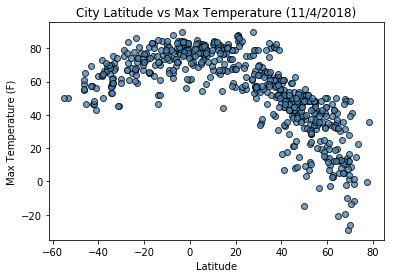

In [39]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Max Temp"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

ChartDate = WeatherDF["Date"][0]
ChartDate = pd.to_datetime(ChartDate, unit='s').date()

plt.grid
plt.title("City Latitude vs Max Temperature (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("Temp_Scatter.png")

#### Latitude vs. Humidity Plot

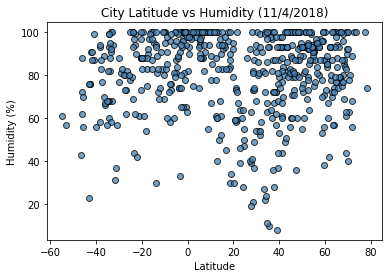

In [40]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Humidity"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Humidity (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("Humidity_Scatter.png")

#### Latitude vs. Cloudiness Plot

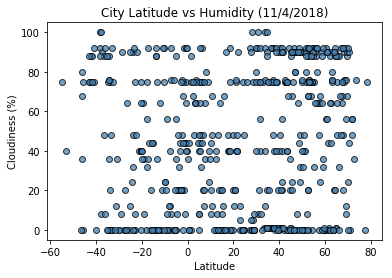

In [41]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Cloudiness"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Humidity (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Cloud_Scatter.png")

#### Latitude vs. Wind Speed Plot

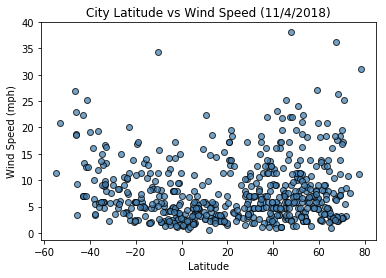

In [42]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Wind Speed"], facecolors = "steelblue", edgecolors = "black", alpha = 0.75)

plt.grid
plt.title("City Latitude vs Wind Speed (" + str(ChartDate.month) + "/" + str(ChartDate.day) + "/" + str(ChartDate.year) + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("Wind_Scatter.png")